# Bias-Variance TradeOff Simulation

In [1]:
import os
import sys
import numpy as np
import pandas as pd
get_ipython().magic(u'matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from IPython.display import display 
import warnings
from collections import OrderedDict

In [2]:
from scipy.stats import norm
import math 
import random

In [3]:
pd.set_option('chained_assignment',None)
warnings.filterwarnings('ignore')

## Simulation of Random Data

### 1. Plot True Hypothessis

In [4]:
def true_hypo():
    x =np.linspace(-math.pi,math.pi,240)
    y=[math.sin(k)+norm.rvs(scale=0.1) for k in x]
    z=[math.sin(k) for k in x]
    fig,ax =plt.subplots(1,1,figsize=(8,6))
    ax.plot(x,y,label='Deterministic Y')
    ax.plot(x,z,label='Random Y')
    ax.legend(loc='best')
    ax.set_title("Simulating True Hyp")

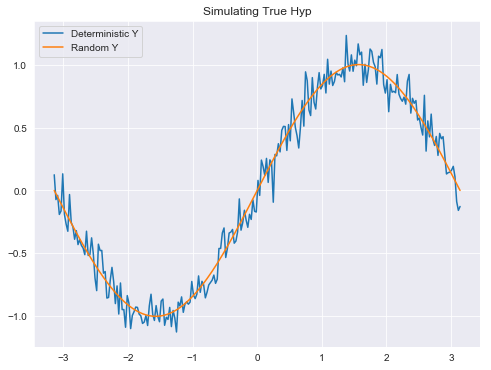

In [5]:
true_hypo()

### 2. Generating  a random sample of size  N=3 fitting a simple model

In [6]:
# random.sample(np.linspace(-math.pi,math.pi,240).tolist(),3)

In [7]:
def sim_model():
    x =np.linspace(-math.pi,math.pi,240)
    y=[math.sin(k)+norm.rvs(scale=0.1) for k in x]
    z=[math.sin(k) for k in x]
    #Select 3 samples and plot 
    simple_sample = random.sample(np.linspace(-math.pi,math.pi,240).tolist(),3)
    simple_sample_y=[math.sin(k)+norm.rvs(scale=0.1) for k in simple_sample]
    p = np.poly1d(np.polyfit(simple_sample, simple_sample_y, 0))
    
    t = np.linspace(-math.pi, math.pi, 200)
    
    
    fig,ax =plt.subplots(1,1,figsize=(8,6))
    ax.plot(x,y,label='Random Y',color='gray',alpha=0.3)
    ax.plot(x,z,label='Deterministic Y') 
    ax.scatter(simple_sample,simple_sample_y,color='r')
    ax.plot(t, p(t), '-')
    
    ax.legend(loc='best')
    ax.set_title("Simulating a Simple Model")

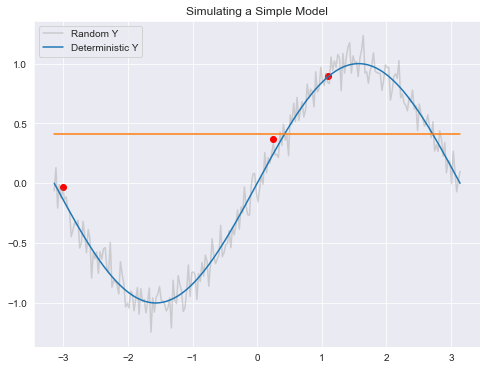

In [8]:
sim_model()

### 3. Generating  a random sample of size  N=3 fitting a complex  model

In [9]:
def com_model():
    x =np.linspace(-math.pi,math.pi,240)
    y=[math.sin(k)+norm.rvs(scale=0.1) for k in x]
    z=[math.sin(k) for k in x]
    #Select 3 samples and plot 
    simple_sample = random.sample(np.linspace(-math.pi,math.pi,240).tolist(),3)
    simple_sample_y=[math.sin(k)+norm.rvs(scale=0.1) for k in simple_sample]
    p = np.poly1d(np.polyfit(simple_sample, simple_sample_y, 1))
    
    t = np.linspace(-math.pi, math.pi, 200)
    
    
    fig,ax =plt.subplots(1,1,figsize=(8,6))
    ax.plot(x,y,label='Random Y',color='gray',alpha=0.3)
    ax.plot(x,z,label='Deterministic Y') 
    ax.scatter(simple_sample,simple_sample_y,color='r')
    ax.plot(t, p(t), '-')
    
    ax.legend(loc='best')
    ax.set_title("Simulating a Complex  Model")

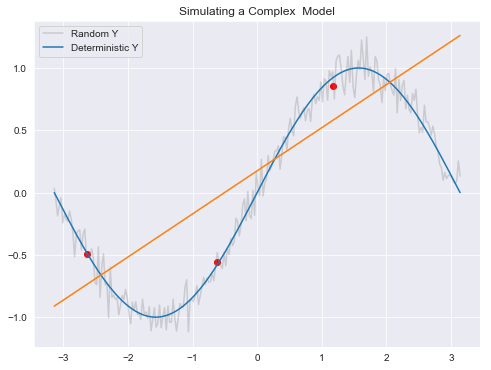

In [10]:
com_model()

### 4. Generate K such samples and fit models

In [11]:
def large_k_sim(runs=10,path='E:\\solution_area\\GREAT_LEARNING\\1.Featurization_Model_Selection_Tuning'):
    
    x_adder=[]
    y_adder=[]
    hypo_adder=[]
    model_adder=[]
    x_dict={}
    
    fig,ax =plt.subplots(1,1,figsize=(7,5))
    for k in range(runs):
        data=random.sample(np.linspace(-math.pi,math.pi,240).tolist(),3)
        x_sample = [round(m,3) for m in data]
        y_sample=[round(math.sin(k)+norm.rvs(scale=0.1),3) for k in x_sample]
        p = np.poly1d(np.polyfit(x_sample, y_sample, 0))
        x_adder +=x_sample
        y_adder +=y_sample
        hypo_adder +=[round(math.sin(j),3) for j in data ]
        model_adder +=[round(p[0],3) for _ in range(3)]
        for i in range(len(x_sample)):
            if x_sample[i] in x_dict.keys():
                x_dict[x_sample[i]]=x_dict[x_sample[i]]+[y_sample[i]]
            else:
                x_dict[x_sample[i]]=[y_sample[i]]
        
        ax.plot(np.linspace(-math.pi,math.pi,240),[p[0]]*240)
    for k,v in x_dict.items():
        ax.plot([k]*(len(v)),list(v),color='white',alpha=1,label='Samples',lw=1)
    ax.set_title(str(runs)+" "+"Simple Models Generated using K Training Samples of Size 3",fontsize=15)   
    return x_adder,y_adder,hypo_adder,model_adder,x_dict
    

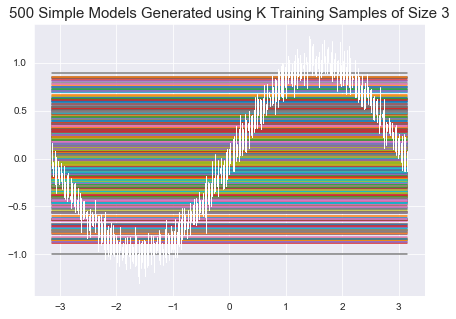

In [12]:
x_adder_sim,y_adder_sim,hypo_adder_sim,\
model_adder_sim,x_dict_sim=large_k_sim(runs=500,
                path='E:\\solution_area\\GREAT_LEARNING\\1.Featurization_Model_Selection_Tuning')

In [13]:
def large_k_com(runs=10,path='E:\\solution_area\\GREAT_LEARNING\\1.Featurization_Model_Selection_Tuning'):
    
    x_adder=[]
    y_adder=[]
    hypo_adder=[]
    model_adder=[]
    x_dict={}
    
    fig,ax =plt.subplots(1,1,figsize=(7,5))
    for k in range(runs):
        data=random.sample(np.linspace(-math.pi,math.pi,240).tolist(),3)
        x_sample = [round(m,3) for m in data]
        y_sample=[round(math.sin(k)+norm.rvs(scale=0.1),3) for k in x_sample]
        p = np.poly1d(np.polyfit(x_sample, y_sample, 1))
        model_forecast =[p(x) for x in x_sample ]
        x_adder +=x_sample
        y_adder +=y_sample
        hypo_adder +=[round(math.sin(j),3) for j in data ]
        model_adder +=model_forecast
        for i in range(len(x_sample)):
            if x_sample[i] in x_dict.keys():
                x_dict[x_sample[i]]=x_dict[x_sample[i]]+[y_sample[i]]
            else:
                x_dict[x_sample[i]]=[y_sample[i]]
        t=np.linspace(-math.pi,math.pi,240)
        ax.plot(t,p(t),'_')
    for k,v in x_dict.items():
        ax.plot([k]*(len(v)),list(v),color='white',alpha=1,label='Samples')
    ax.set_title(str(runs)+" "+"Complex Models Generated using K Training Samples of Size 3",fontsize=15)   
    return x_adder,y_adder,hypo_adder,model_adder,x_dict
    

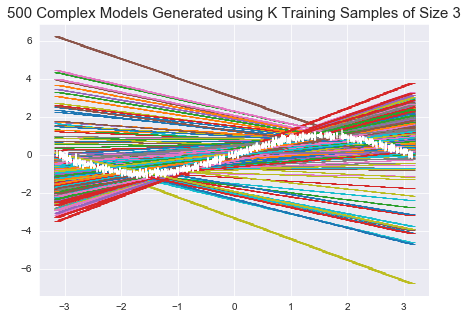

In [14]:
x_adder_com,y_adder_com,hypo_adder_com,\
model_adder_com,x_dict_com=large_k_com(runs=500,
                path='E:\\solution_area\\GREAT_LEARNING\\1.Featurization_Model_Selection_Tuning')

### 4. Bias Variance Plot for Simple Model

In [15]:
# x_adder_sim,y_adder_sim,hypo_adder_sim,\
# model_adder_sim,x_dict_sim
# x_y_dict_sim

#### helper function for plotting

In [16]:
def bvt(x_adder_sim,y_adder_sim,hypo_adder_sim,model_adder_sim):
    
    x_y_dict_sim ={}
    x_model_dict_sim={}
    x_hypo_dict_sim ={}
    
    for i in range(len(x_adder_sim)):
            if x_adder_sim[i] in x_y_dict_sim.keys():
                x_y_dict_sim[x_adder_sim[i]]=x_y_dict_sim[x_adder_sim[i]]+[y_adder_sim[i]]
                x_model_dict_sim[x_adder_sim[i]]=x_model_dict_sim[x_adder_sim[i]]+[model_adder_sim[i]]
                x_hypo_dict_sim[x_adder_sim[i]]=x_hypo_dict_sim[x_adder_sim[i]]+[hypo_adder_sim[i]]
            else:
                x_y_dict_sim[x_adder_sim[i]]=[y_adder_sim[i]]
                x_model_dict_sim[x_adder_sim[i]]=[model_adder_sim[i]]
                x_hypo_dict_sim[x_adder_sim[i]]=[hypo_adder_sim[i]]
                

    y_var_dict ={} # Yvar 
    model_var_dict={} # Model Var 
    bias_var_dict ={} # Bais Dict 
    perror_dict ={} # Prediction Error Dict
    
    #y_var_dict[k]=np.mean((np.array(x_y_dict_sim[k])-np.array(x_hypo_dict_sim[k]))**2)
    for k,v in  x_y_dict_sim.items():
        y_var_dict[k]=np.array(0.0001)
        model_var_dict[k]=np.var(np.array(x_model_dict_sim[k]))+0.0001
        bias_var_dict[k]=(np.mean(np.array(x_model_dict_sim[k]))-np.mean(np.array(x_hypo_dict_sim[k])))**2
        perror_dict[k]=np.mean(((np.array(x_y_dict_sim[k])-np.array(x_model_dict_sim[k]))**2))
    
    diff_dict ={}
    for k,v in y_var_dict.items():
        diff_dict[k]=round(perror_dict[k]-y_var_dict[k]-model_var_dict[k]-bias_var_dict[k],0)
    
    return perror_dict,model_var_dict,bias_var_dict,y_var_dict,diff_dict

In [17]:
pred_error,model_var,bias_sqr,noise,diff_check=bvt(x_adder_sim,y_adder_sim,hypo_adder_sim,model_adder_sim)

In [18]:
# diff_check

In [19]:
# Check Calcualtion is corrct 
if np.sum(list(diff_check.values()))==0.0:
    print ("Correct Simulation")
else:
    print ( "Check Bugs")

Correct Simulation


###  Generate Plot

In [20]:
pred_sorted = OrderedDict(sorted(pred_error.items()))
model_sorted=OrderedDict(sorted(model_var.items()))
bais_sorted =OrderedDict(sorted(bias_sqr.items()))
noise_sorted =OrderedDict(sorted(noise.items()))

### Simple Model Bias -Variance Plot with Noise+Bias Sqr

Text(0.5,0.98,'Simple Model Bias-Variance Decompostion: Noise+Bias Sqr')

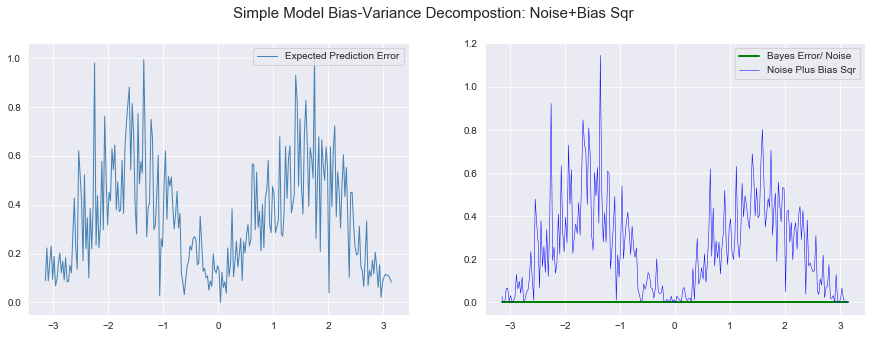

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(list(pred_sorted.keys()),list(pred_sorted.values()),color='steelblue',lw=1,label="Expected Prediction Error")
ax[1].plot(noise_sorted.keys(),noise_sorted.values(),color='g',lw=2,label='Bayes Error/ Noise')
ax[1].plot(noise_sorted.keys(),[list(noise_sorted.values())[i]+list(bais_sorted.values())[i] \
           for i in range(len(list(bais_sorted.values())))],lw=0.5,color='b',label='Noise'+' '+'Plus'+' '+'Bias Sqr')
ax[1].legend(loc='best')
ax[0].legend(loc='best')
plt.suptitle("Simple Model Bias-Variance Decompostion: Noise+Bias Sqr",fontsize=15)

### Simple Model Bias -Variance Plot with Noise+Bias Sqr+Varaince

Text(0.5,0.98,'Simple Model Bias-Variance Decompostion: Noise+Bias Sqr Model Var')

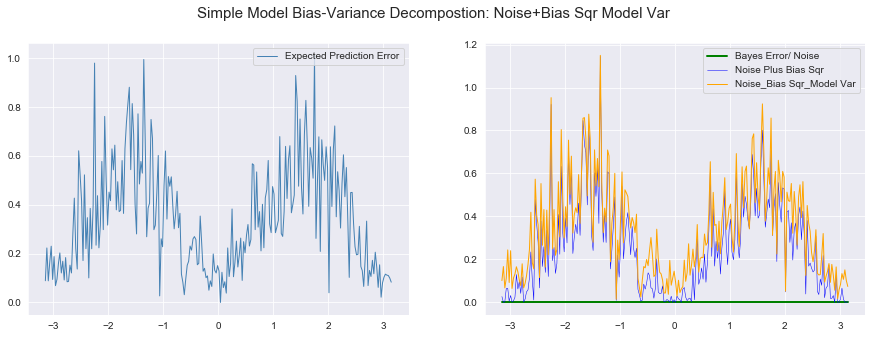

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(list(pred_sorted.keys()),list(pred_sorted.values()),color='steelblue',lw=1,label="Expected Prediction Error")
ax[1].plot(noise_sorted.keys(),noise_sorted.values(),color='g',lw=2,label='Bayes Error/ Noise')
ax[1].plot(noise_sorted.keys(),[list(noise_sorted.values())[i]+list(bais_sorted.values())[i] \
           for i in range(len(list(bais_sorted.values())))],lw=0.5,color='b',label='Noise'+' '+'Plus'+' '+'Bias Sqr')
ax[1].plot(noise_sorted.keys(),[list(noise_sorted.values())[i]+list(bais_sorted.values())[i] \
                                +list(model_sorted.values())[i] \
           for i in range(len(list(bais_sorted.values())))],lw=1,
           color='orange',label='Noise'+'_'+'Bias Sqr'+'_'+'Model Var')
ax[1].legend(loc='best')
ax[0].legend(loc='best')
plt.suptitle("Simple Model Bias-Variance Decompostion: Noise+Bias Sqr"+' '+'Model Var',fontsize=15)

### 5. Bias Variance Plot for Complex  Model

In [23]:
pred_error,model_var,bias_sqr,noise,diff_check=bvt(x_adder_com,y_adder_com,hypo_adder_com,model_adder_com)

In [24]:
# Check Calcualtion is corrct 
if np.sum(list(diff_check.values()))==0.0:
    print ("Correct Simulation")
else:
    print ( "Check Bugs")

Correct Simulation


In [25]:
pred_sorted = OrderedDict(sorted(pred_error.items()))
model_sorted=OrderedDict(sorted(model_var.items()))
bais_sorted =OrderedDict(sorted(bias_sqr.items()))
noise_sorted =OrderedDict(sorted(noise.items()))

### Complex Model Bias -Variance Plot with Noise+Bias Sqr

Text(0.5,0.98,'Complex Model Bias-Variance Decompostion: Noise+Bias Sqr')

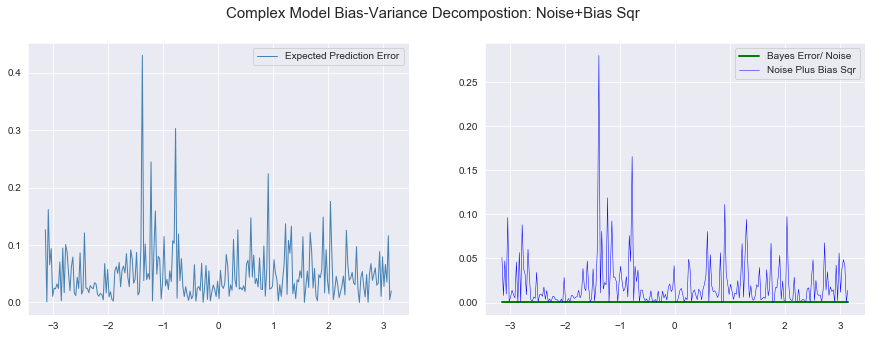

In [26]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(list(pred_sorted.keys()),list(pred_sorted.values()),color='steelblue',lw=1,label="Expected Prediction Error")
ax[1].plot(noise_sorted.keys(),noise_sorted.values(),color='g',lw=2,label='Bayes Error/ Noise')
ax[1].plot(noise_sorted.keys(),[list(noise_sorted.values())[i]+list(bais_sorted.values())[i] \
           for i in range(len(list(bais_sorted.values())))],lw=0.5,color='b',label='Noise'+' '+'Plus'+' '+'Bias Sqr')
ax[1].legend(loc='best')
ax[0].legend(loc='best')
plt.suptitle("Complex Model Bias-Variance Decompostion: Noise+Bias Sqr",fontsize=15)

Text(0.5,0.98,'Simple Model Bias-Variance Decompostion: Noise+Bias Sqr Model Var')

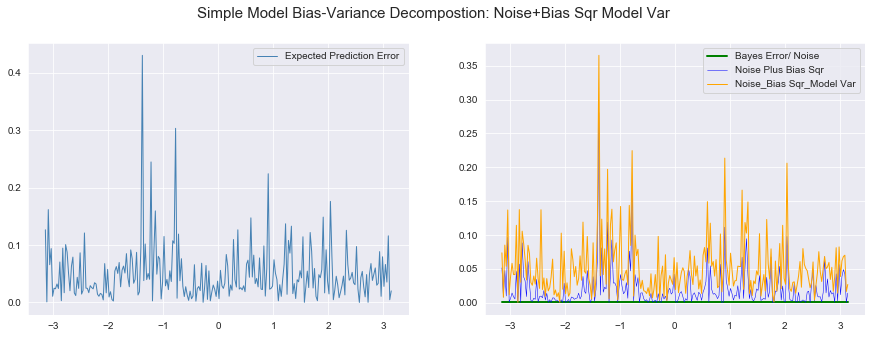

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(list(pred_sorted.keys()),list(pred_sorted.values()),color='steelblue',lw=1,label="Expected Prediction Error")
ax[1].plot(noise_sorted.keys(),noise_sorted.values(),color='g',lw=2,label='Bayes Error/ Noise')
ax[1].plot(noise_sorted.keys(),[list(noise_sorted.values())[i]+list(bais_sorted.values())[i] \
           for i in range(len(list(bais_sorted.values())))],lw=0.5,color='b',label='Noise'+' '+'Plus'+' '+'Bias Sqr')
ax[1].plot(noise_sorted.keys(),[list(noise_sorted.values())[i]+list(bais_sorted.values())[i] \
                                +list(model_sorted.values())[i] \
           for i in range(len(list(bais_sorted.values())))],lw=1,
           color='orange',label='Noise'+'_'+'Bias Sqr'+'_'+'Model Var')
ax[1].legend(loc='best')
ax[0].legend(loc='best')
plt.suptitle("Simple Model Bias-Variance Decompostion: Noise+Bias Sqr"+' '+'Model Var',fontsize=15)

## Bais Variance Decompostion Main Findings

- It is theortical result to shed light possible errors/limitations of the model.
- Simpler Model is **Bias Prone**
- Complex Models would have **Higher Varaince** which is prine to over-fitting.
- Simulation could used as a tool to shed light related theoritical aspects.